#### Links referred to for analyses and methods deployed in here -
- https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
- https://otexts.com/fpp2/

In [498]:
# load necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import numpy as np
import itertools
plt.rcParams['text.color'] = 'k'

## Context
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying homes because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

In [413]:
data = pd.read_csv("avocado.csv")

## Content
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [414]:
data.shape

(18249, 14)

In [415]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

## Data description
Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [416]:
# convert Date to a proper datetime type
data["Datetime"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")

In [417]:
# sort the dataset to simplify time-series analysis down the line
data = data.sort_values(by="Datetime")

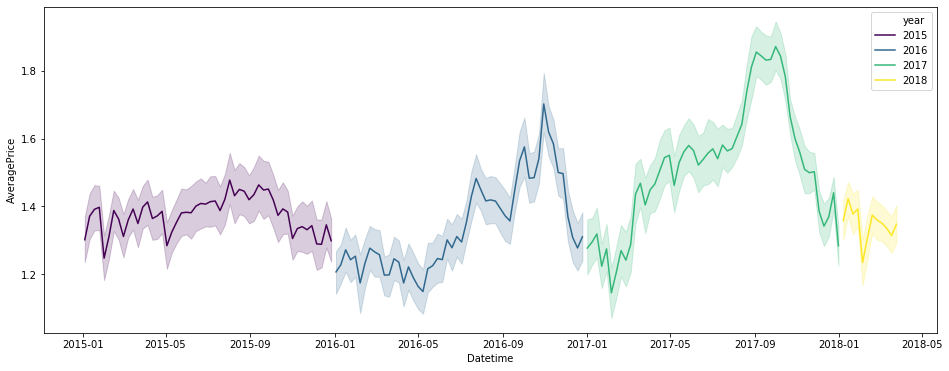

In [419]:
# plot overall time series
plt.figure(figsize=(16, 6))
sns.lineplot(x="Datetime", 
             y="AveragePrice", 
             hue="year",
             data=data,
             palette="viridis"
            )

In [421]:
# let's see the distinct regions we have data for
data.region.unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [422]:
# split data accordingly
US_data = data[data.region == "TotalUS"]
US_West = data[data.region == "West"]
US_Midsouth = data[data.region == "Midsouth"]
US_SouthCentral = data[data.region == "SouthCentral"]
US_Southeast = data[data.region == "Southeast"]
US_Northeast = data[data.region == "Northeast"]
US_Plains = data[data.region == "Plains"]

Text(0.5, 1.0, 'Avocado rates across US')

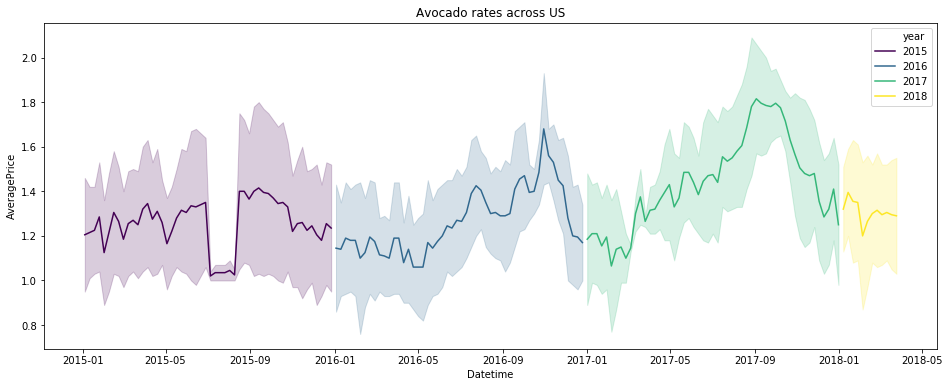

In [423]:
# plot overall time series for US at national level
plt.figure(figsize=(16, 6))
sns.lineplot(x="Datetime", 
             y="AveragePrice", 
             hue="year",
             data=US_data,
             palette="viridis"
            ).set_title("Avocado rates across US")

### Let's focus on the aggregated US trends going forward

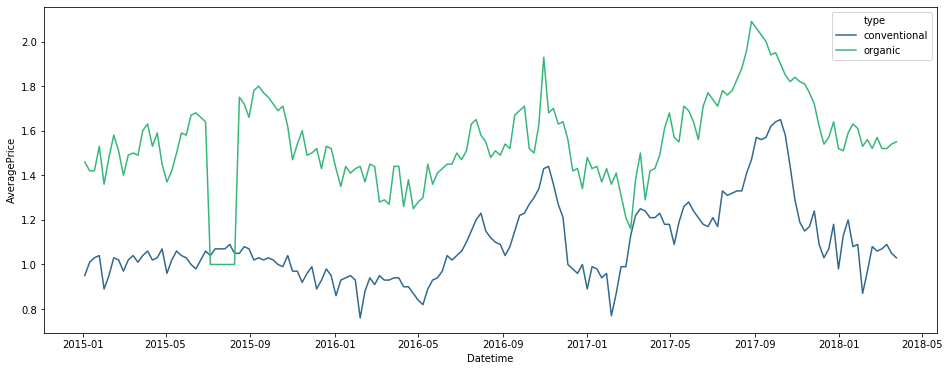

In [424]:
# let's compare the aggregate trends for organic vs conventional avocados across US
plt.figure(figsize=(16, 6))
sns.lineplot(x="Datetime", 
             y="AveragePrice", 
             hue="type",
             data=US_data,
             palette="viridis"
            )

In [425]:
# Let's divide the dataset into two parts
US_org_data = US_data[US_data.type == "organic"]
US_conv_data = US_data[US_data.type == "conventional"]

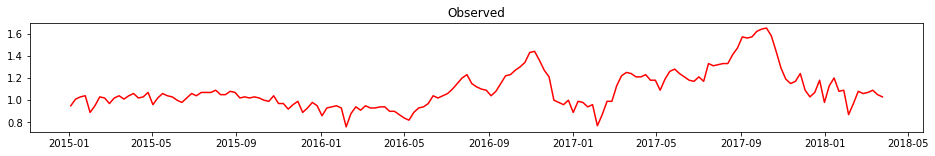

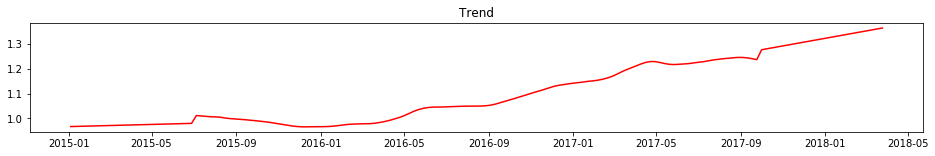

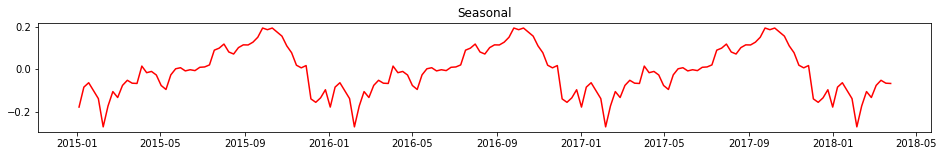

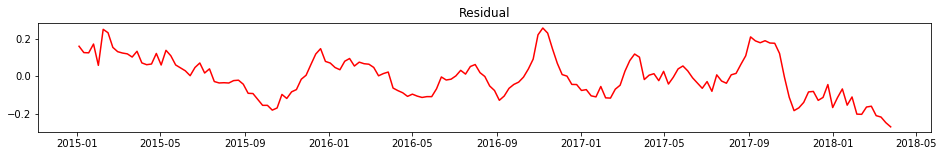

In [426]:
# Decomposing the time series for conventional avocados in additive manner

# set proper indexes for our dataframe
US_conv_data.index = US_conv_data.Datetime

# now, decompose after resampling
from statsmodels.tsa.seasonal import seasonal_decompose as sd
y = US_conv_data['AveragePrice'].resample('W').mean()
decomposition = sd(x=y, model='additive', extrapolate_trend='freq')

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.observed, color="red").set_title("Observed")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.trend, color="red").set_title("Trend")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.seasonal, color="red").set_title("Seasonal")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.resid, color="red").set_title("Residual")
plt.show()

#fig = decomposition.plot()
#plt.show()

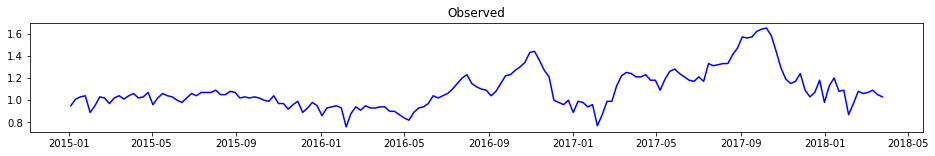

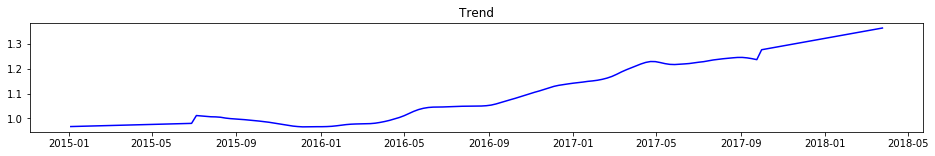

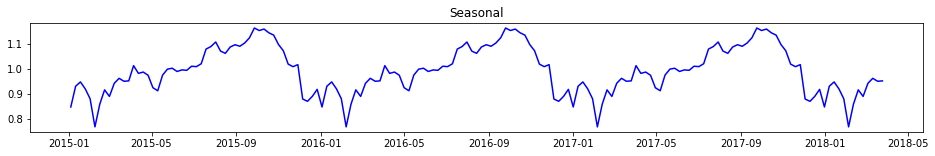

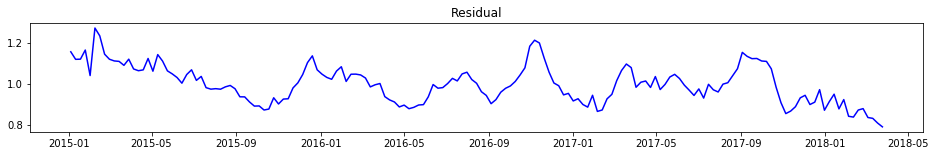

In [427]:
# Decomposing the time series for conventional avocados in multiplicative manner

# set proper indexes for our dataframe
US_conv_data.index = US_conv_data.Datetime

# now, decompose after resampling
from statsmodels.tsa.seasonal import seasonal_decompose as sd
y = US_conv_data['AveragePrice'].resample('W').mean()
decomposition = sd(x=y, model='multiplicative', extrapolate_trend='freq')

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.observed, color="blue").set_title("Observed")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.trend, color="blue").set_title("Trend")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.seasonal, color="blue").set_title("Seasonal")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.resid, color="blue").set_title("Residual")
plt.show()


#fig = decomposition.plot()
#plt.show()

In [428]:
# We use the Dickey Fuller test to check if our Average_Price time-series is stationary
from statsmodels.tsa.stattools import adfuller
df_results = adfuller(US_conv_data["AveragePrice"])

# the p-value of the DF test is the 2nd element of this list
df_results

(-2.5733413599971198,
 0.09863318474463018,
 0,
 168,
 {'1%': -3.4698858990744115,
  '5%': -2.8789026251889647,
  '10%': -2.5760266680839004},
 -394.76019758011125)

The p-value is 0.09, which is greater than 0.05. Thus, we can conclude that our time series is not stationary :(

In [429]:
# We use the Dickey Fuller test to check if our Total_Volume time-series is stationary
from statsmodels.tsa.stattools import adfuller
df_results = adfuller(US_conv_data["Total Volume"])

# the p-value of the DF test is the 2nd element of this list
df_results

(-2.9966186410835727,
 0.035211385549194216,
 13,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 5152.9819899761405)

The p-value is 0.035, which is lesser than 0.05! Thus, we can conclude that this time series is stationary :D

##### It is clear that we need to transform our data before modeling it as a time series

In [433]:
# We use the Dickey Fuller test to check if our log transformed Average_Price time-series is stationary
US_conv_data["ln_AveragePrice"] = US_conv_data["AveragePrice"].apply(np.log)
df_results = adfuller(US_conv_data["ln_AveragePrice"])

# the p-value of the DF test is the 2nd element of this list
df_results

/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(-2.8628584245363085,
 0.04984067220924174,
 0,
 168,
 {'1%': -3.4698858990744115,
  '5%': -2.8789026251889647,
  '10%': -2.5760266680839004},
 -410.08041257297054)

This is still not sufficient (0.049 < 0.05 >> 0.01), we can check if the growth rates of Average_Price are stationary instead.

In [434]:
US_conv_data["AveragePriceGrowth"] = US_conv_data["AveragePrice"].pct_change()

/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [439]:
# take a quick lookie here
US_conv_data[["Datetime","AveragePrice","ln_AveragePrice","AveragePriceGrowth"]]

,Datetime,AveragePrice,ln_AveragePrice,AveragePriceGrowth
Datetime,,,,
2015-01-04,2015-01-04,0.95,-0.051293,NaN
2015-01-11,2015-01-11,1.01,0.009950,0.063158
2015-01-18,2015-01-18,1.03,0.029559,0.019802
2015-01-25,2015-01-25,1.04,0.039221,0.009709
2015-02-01,2015-02-01,0.89,-0.116534,-0.144231
...,...,...,...,...
2018-02-25,2018-02-25,1.06,0.058269,-0.018519
2018-03-04,2018-03-04,1.07,0.067659,0.009434
2018-03-11,2018-03-11,1.09,0.086178,0.018692


In [437]:
# We use the Dickey Fuller test to check if our Average_Price growth rates' time-series is stationary
df_results = adfuller(US_conv_data["AveragePriceGrowth"].dropna())

# the p-value of the DF test is the 2nd element of this list
df_results

(-14.162931891636019,
 2.065849113921869e-26,
 0,
 167,
 {'1%': -3.470126426071447,
  '5%': -2.8790075987120027,
  '10%': -2.5760826967621644},
 -407.08486400474726)

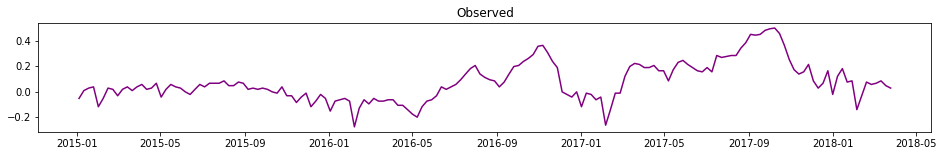

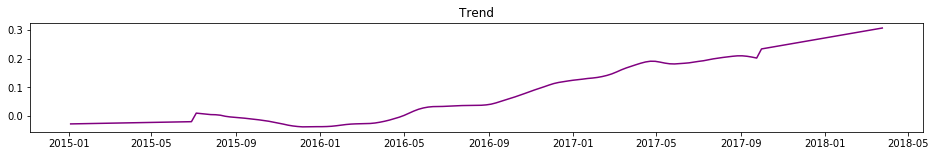

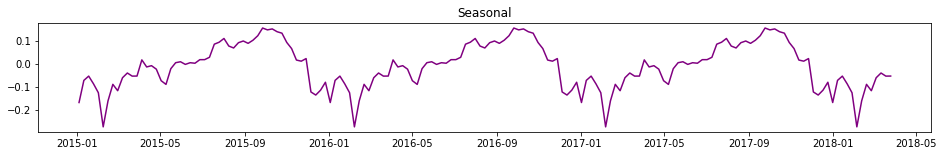

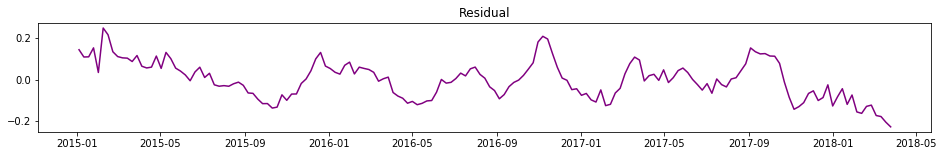

In [446]:
# Decomposing the log transformed Average_Price time series for conventional avocados in additive manner

# decompose after resampling, just to be sure
from statsmodels.tsa.seasonal import seasonal_decompose as sd
y = US_conv_data['ln_AveragePrice'].dropna().resample('W').mean()
decomposition = sd(x=y, model='additive', extrapolate_trend='freq')

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.observed, color="purple").set_title("Observed")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.trend, color="purple").set_title("Trend")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.seasonal, color="purple").set_title("Seasonal")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.resid, color="purple").set_title("Residual")
plt.show()


#fig = decomposition.plot()
#plt.show()

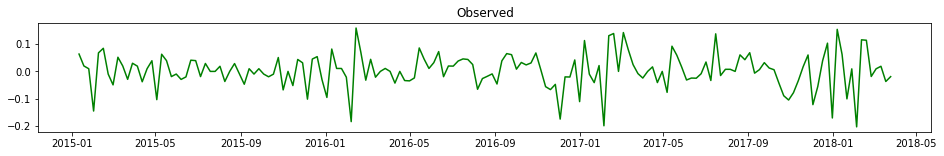

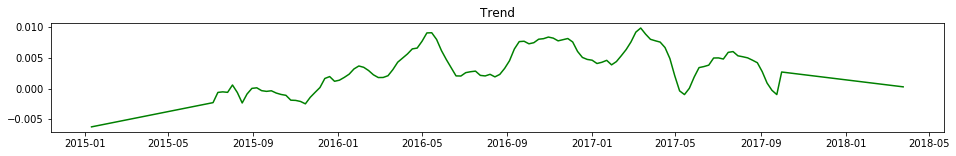

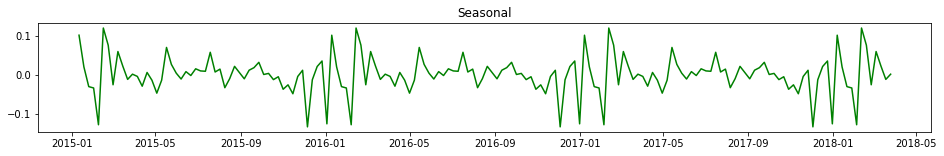

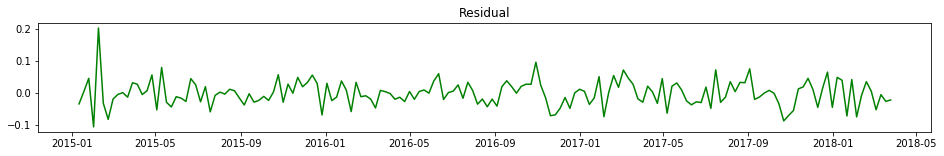

In [443]:
# Decomposing the time series for conventional avocados in additive manner

# decompose after resampling, just to be sure
from statsmodels.tsa.seasonal import seasonal_decompose as sd
y = US_conv_data['AveragePriceGrowth'].dropna().resample('W').mean()
decomposition = sd(x=y, model='additive', extrapolate_trend='freq')

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.observed, color="green").set_title("Observed")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.trend, color="green").set_title("Trend")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.seasonal, color="green").set_title("Seasonal")
plt.show()

plt.figure(figsize=(16,2))
sns.lineplot(data=decomposition.resid, color="green").set_title("Residual")
plt.show()


#fig = decomposition.plot()
#plt.show()

In [462]:
# let's plot the rolling averages and variances across the growth rates' time series

US_conv_data["AveragePriceGrowth_ravg"] = US_conv_data["AveragePriceGrowth"].rolling(12).mean()
US_conv_data["AveragePriceGrowth_rvar"] = US_conv_data["AveragePriceGrowth"].rolling(12).std() ** 2

/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [463]:
US_conv_data[["Datetime","AveragePriceGrowth","AveragePriceGrowth_ravg","AveragePriceGrowth_rvar"]]

,Datetime,AveragePriceGrowth,AveragePriceGrowth_ravg,AveragePriceGrowth_rvar
Datetime,,,,
2015-01-04,2015-01-04,NaN,NaN,NaN
2015-01-11,2015-01-11,0.063158,NaN,NaN
2015-01-18,2015-01-18,0.019802,NaN,NaN
2015-01-25,2015-01-25,0.009709,NaN,NaN
2015-02-01,2015-02-01,-0.144231,NaN,NaN
...,...,...,...,...
2018-02-25,2018-02-25,-0.018519,0.004113,0.013467
2018-03-04,2018-03-04,0.009434,0.009487,0.013120
2018-03-11,2018-03-11,0.018692,0.007808,0.013046


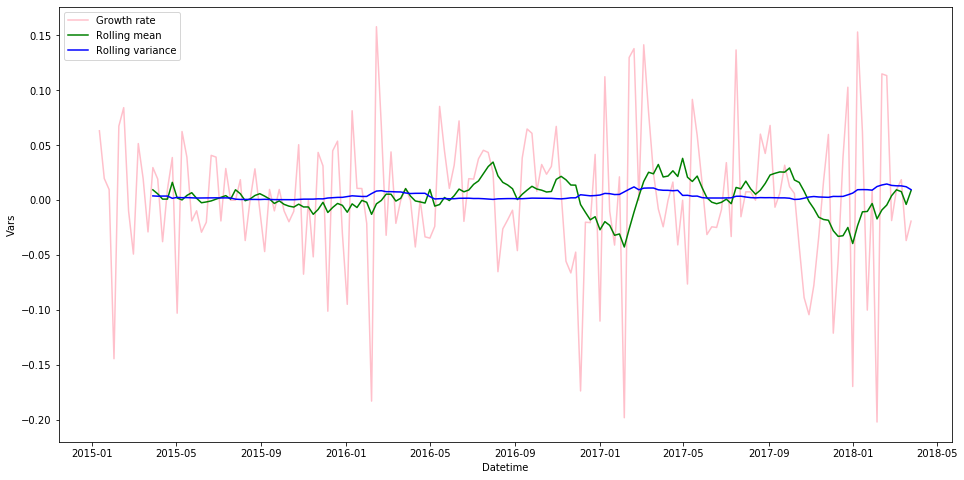

In [469]:
# plot the growth rate alongside moving average and variance (window size = last 12 observations)
plt.figure(figsize=(16,8))
sns.lineplot(x="Datetime", y="AveragePriceGrowth", data=US_conv_data, color="pink")
sns.lineplot(x="Datetime", y="AveragePriceGrowth_ravg", data=US_conv_data, color="green")
sns.lineplot(x="Datetime", y="AveragePriceGrowth_rvar", data=US_conv_data, color="blue")
plt.ylabel("Vars")
plt.xlabel("Datetime")
plt.legend(["Growth rate","Rolling mean","Rolling variance"])
plt.show()

### Well, all this looks quite satisfactory now :)

In [633]:
# let's proceed with SARIMAX modeling now
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Some examples of parameter combinations for Seasonal ARIMA - ')
print('SARIMAX= {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX= {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX= {} x {}'.format(pdq[2], seasonal_pdq[5]))
print('SARIMAX= {} x {}'.format(pdq[2], seasonal_pdq[7]))

Some examples of parameter combinations for Seasonal ARIMA - 
SARIMAX= (0, 0, 1) x (0, 0, 0, 12)
SARIMAX= (0, 0, 1) x (0, 1, 0, 12)
SARIMAX= (0, 1, 0) x (1, 0, 1, 12)
SARIMAX= (0, 1, 0) x (1, 1, 1, 12)


In [634]:
y = US_conv_data['AveragePrice'].resample('W').mean()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:512.7933967589479
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:334.8757441116444
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-35.85701703234816
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-63.52826895433327
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-35.804718375565386
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-96.40705401796039
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-41.36264637377927


/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-57.486080708813276
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:291.3648239068721
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:142.03954216744387
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-169.0642396933961
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-197.51170122411202
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-171.47907219531498
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-232.57621627627645
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-177.3385580732096
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-195.49608399233838
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-428.1188889108171
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-392.4033871899011
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-295.75047193235406
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-338.22075855008234
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-395.84602248713304
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-390.6227081303242
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-308.0254467218867


/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-328.6086841304357
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-422.78169690695154
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-387.23807742072825
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-291.35240147785464
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-333.62490071139484
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-393.8994874369115
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-385.3549971715407
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-306.0889472673754
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-323.97811822215954
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-428.98165641337556
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-394.0291805490551
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-303.96162485522325


/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-344.35142623454453
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-393.9979026292021
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-392.158679519129
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-310.7866935019462
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-334.0953207989102
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-424.3916395069249
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-388.6067679802146
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-299.8380516879614
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-339.41344455610636
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-392.04598700300414
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-386.7422900297736
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-309.316420281836
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-329.2371664146942
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-426.2414452604487
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-390.453262295011
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-293.8935197106802
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-336.75798990682586
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-390.42646

/Users/rzende/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-390.663875923761
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-385.94992138028005
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-301.0638515580498
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-322.00889519200774


ARIMA(1, 0, 0)x(0, 0, 0, 12)12 seems to be giving us the minimum AIC (= -428.98), so we proceed with that.

In [635]:
# fit the model and see summary/characteristics of fit
model = sm.tsa.statespace.SARIMAX(y, 
                                order=(1,0,0), # was 1,0,0 for reference
                                seasonal_order=(1,1,0,12), # was 0,0,0,12 for reference 
                                enforce_stationarity=False, 
                                enforce_invertibility=False)

results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       AveragePrice   No. Observations:                  169
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                 158.393
Date:                            Mon, 06 Apr 2020   AIC                           -310.787
Time:                                    12:56:56   BIC                           -301.877
Sample:                                01-04-2015   HQIC                          -307.166
                                     - 03-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9287      0.032     28.981      0.000       0.866       0.992
ar.S.L12      -0.4911      0.081   

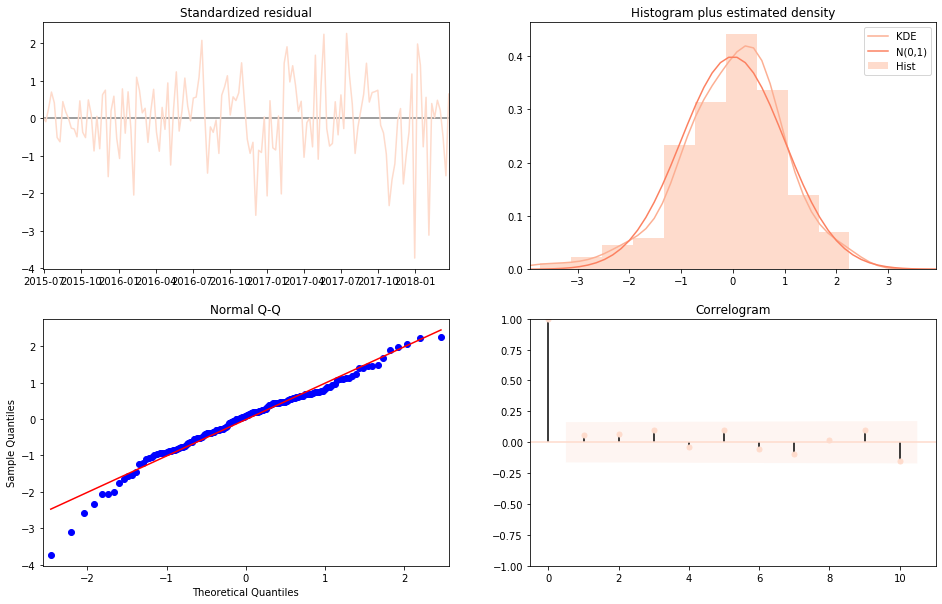

In [636]:
# see diagnostics
results.plot_diagnostics(figsize=(16, 10))
plt.show()

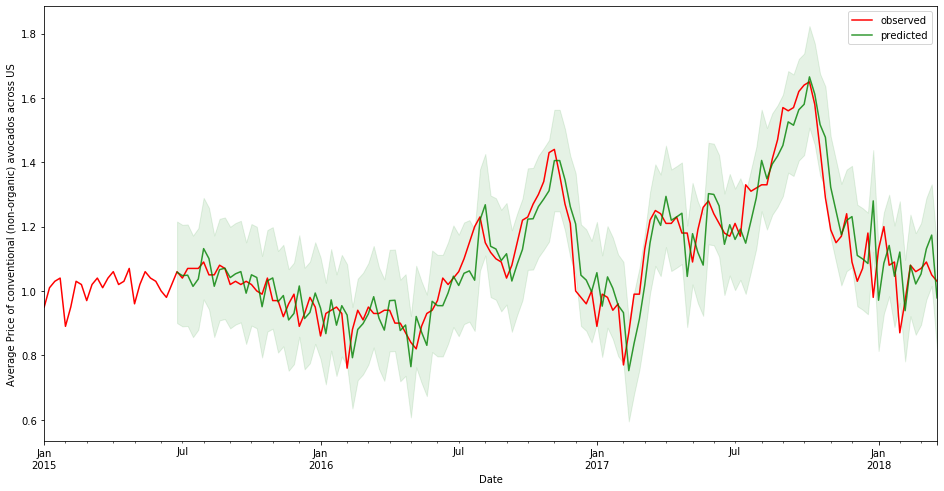

In [642]:
# to assess our fit, we compare predicted values to observed values

# get predictions and confidence intervals
pred = results.get_prediction(start=pd.to_datetime('2015-06-28'), dynamic=False) #2015-01-04
pred_ci = pred.conf_int()

# plot the observed data
ax = y['2015':].plot(label='observed', color="red")

# plot the predictions
pred.predicted_mean.plot(ax=ax, label='predicted', color="green", alpha=.8, figsize=(16, 8))

# plot the confidence intervals for predictions
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='green', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Average Price of conventional (non-organic) avocados across US')
plt.legend()

plt.show()

### Well, that's an awesome fit to be honest. It looks really good and aligns very well with observed data :)

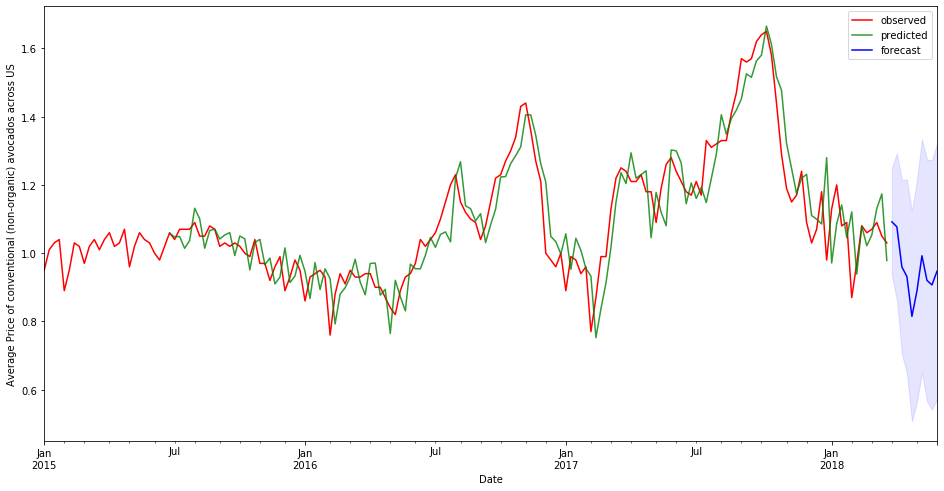

In [643]:
# let's try forecasting with this model for the next 10 weeks

# get forecasts and UIs
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(16, 8), color = "red")
pred.predicted_mean.plot(ax=ax, label='predicted', color="green", alpha=.8)

pred_uc.predicted_mean.plot(ax=ax, label='forecast', color = "blue")
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Average Price of conventional (non-organic) avocados across US')

plt.legend()
plt.show()

#### I'd say that looks pretty realistic.